In [10]:
%reset -f

In [11]:
import numpy as np
from matplotlib import pyplot as plt
import torch
import cv2

If you require the complete source code or have specific inquiries, please feel free to contact me via email at [w1858682345@163.com].
Thank you for your understanding and cooperation!

In [12]:
class torchIWT(torch.nn.Module):

    def __init__(self):
        super(torchIWT, self).__init__()

    def get_phi(self, x):




    def get_phi2d(self, xc, xr, block_size=10):


    def get_psi2d(self, j, kc, kr, xc, xr, thidx, block_size=10):



    def get_idx2d(self, xc, xr, x_transc, x_transr):




    def get_Iwt_l2d(self, imgl, xc, xr, j):



    def get_alpha_jk2d(self, img, xc, xr, j, kc, kr, u, th):



    def get_Iwt2d(self, img, xc, xr, j0, J, e):


In [13]:
def show_approx(imgl, approx, indicies, level_points, s=5, cmap='jet', show_2d_points=True, al=0.5):
    xa = np.arange(approx.shape[0])
    ya = np.arange(approx.shape[1])
    xaa, yaa = np.meshgrid(xa, ya)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xaa, yaa, approx.T, cmap='jet', alpha=al)

    idxnp = []
    if level_points == -1 or level_points >= len(indicies):
        for i in indicies:
            idxnp = idxnp + i
    else:
        idxnp = indicies[level_points]
    idxs = np.array(idxnp)
    idxsu = np.unique(idxs, axis=0).T
    idxsut = (idxsu[1,:], idxsu[0,:])
    ax.scatter(xaa[idxsut], yaa[idxsut], approx.T[idxsut], color='black', marker='o', s=2*s)

    ax.set_title('points_num: {}'.format(len(idxnp)))

    plt.figure()
    fig, axs = plt.subplots(1,2)
    axs[0].imshow(approx, cmap=cmap)
    axs[0].set_title('approx_img')
    axs[1].imshow(imgl, cmap=cmap)
    axs[1].set_title('raw_img')
    if show_2d_points:
        if cmap == 'gray':
            color = 'red'
        else:
            color = 'black'
        points = list(zip(idxsut[0], idxsut[1]))
        x1, y1 = zip(*points)
        axs[1].scatter(x1, y1, color=color, s=s)

    plt.show()


def show_3d_points(approx, indicies, level_points=2):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    indicieslevel = len(indicies)
    if level_points == -1 or level_points >= len(indicies):
        pass
    else:
        indicies = [indicies[level_points]]
    for idx, i in enumerate(indicies):
        i = np.array(i)
        idxsu = np.unique(i, axis=0).T
        if len(idxsu) == 0:
            continue
        idxsut = (idxsu[1,:], idxsu[0,:])
        xa = np.arange(approx.shape[0])
        ya = np.arange(approx.shape[1])
        xaa, yaa = np.meshgrid(xa, ya)
        amm = np.zeros_like(approx)
        if level_points == -1 or level_points >= indicieslevel:
            d = idx
        else:
            d = level_points
        amm[i[:,0], i[:,1]] = d
        ax.set_xlim([0, approx.shape[0]])
        ax.set_ylim([0, approx.shape[1]])
        ax.set_zlim([0, indicieslevel])
        ax.scatter(xaa[idxsut], yaa[idxsut], amm.T[idxsut], marker='o', s=(indicieslevel-idx+1)*5)
    plt.show()

In [14]:
xc = torch.arange(-1,1,1/256).reshape((-1,1))
xr = xc.clone()
imgl = torch.sin(2*xc).reshape((-1,1)) @ torch.cos(5*xr).reshape((1,-1))


j0 = 0
J = 5
e = 0.02

In [15]:
iwtmodel = torchIWT()
iwtmodel.cuda()
approx, indicies = iwtmodel.get_Iwt2d(imgl, xc, xr, j0, J, e)

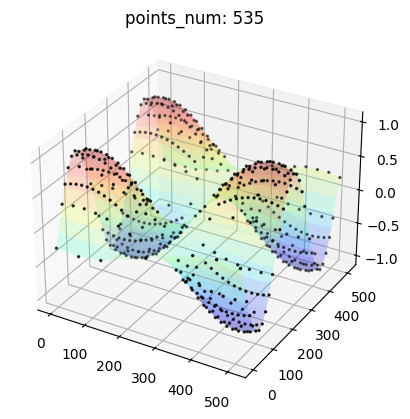

<Figure size 640x480 with 0 Axes>

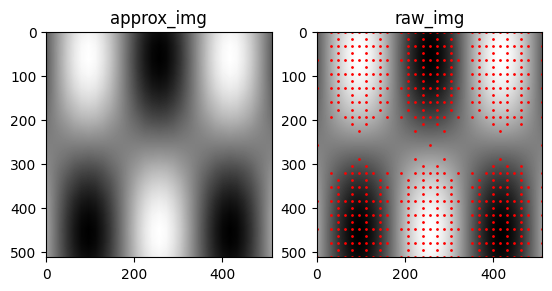

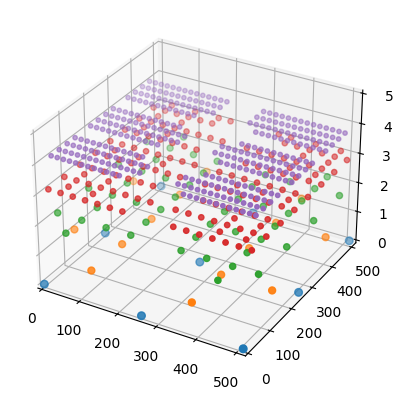

In [16]:
l=-1
show_approx(imgl, approx, indicies, level_points=-1, s=1, cmap='gray', show_2d_points=True, al=0.2)
show_3d_points(approx, indicies, level_points=l)


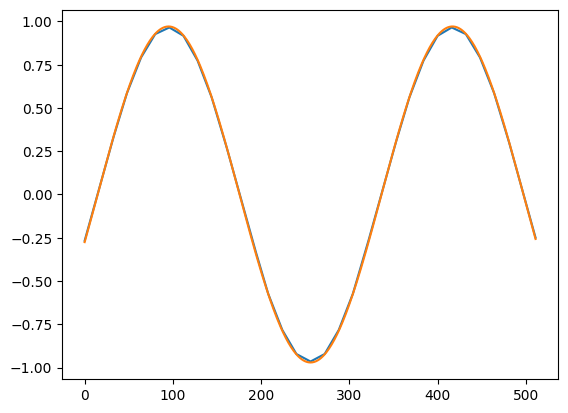

In [17]:
plt.plot(approx[24,:])
plt.plot(imgl[24,:])